Installing the required libraries

In [1]:
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels
!pip install patsy

Found existing installation: statsmodels 0.10.2
Uninstalling statsmodels-0.10.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.10.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 9.8 MB 24.7 MB/s 


Importing the required libraries

In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

from sklearn.preprocessing import StandardScaler
from datetime import timedelta

Reading the data from GitHub

In [4]:
url = 'https://raw.githubusercontent.com/Sai-Kumar-Gorre/Web-and-Mobile/main/us_state_vaccinations%204.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN


In [6]:
df.columns
df['date'] = pd.to_datetime(df['date'])

df = df.drop([ 'total_distributed','total_vaccinations'
       'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred','daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million', 'share_doses_used'], axis=1)




Dropping the unwanted columns from the data frame

In [7]:
df = df.drop([ 'total_distributed','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'distributed_per_hundred','daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million', 'share_doses_used'], axis=1)

In [8]:
df.head

<bound method NDFrame.head of             date  ... people_vaccinated_per_hundred
0     2021-01-12  ...                          1.45
1     2021-01-13  ...                          1.53
2     2021-01-14  ...                          1.64
3     2021-01-15  ...                          1.77
4     2021-01-16  ...                           NaN
...          ...  ...                           ...
18779 2021-10-31  ...                         50.85
18780 2021-11-01  ...                         50.86
18781 2021-11-02  ...                         51.09
18782 2021-11-03  ...                         51.17
18783 2021-11-04  ...                         51.20

[18784 rows x 4 columns]>

Dropping the data of all other states keeping only one state data

In [9]:
df_missouri = df[df['location']=='Missouri']

In [10]:
df_missouri.head

<bound method NDFrame.head of            date  ... people_vaccinated_per_hundred
9530 2021-01-12  ...                          1.76
9531 2021-01-13  ...                          1.76
9532 2021-01-14  ...                          2.37
9533 2021-01-15  ...                          2.50
9534 2021-01-16  ...                           NaN
...         ...  ...                           ...
9820 2021-10-31  ...                         56.93
9821 2021-11-01  ...                         56.94
9822 2021-11-02  ...                         56.98
9823 2021-11-03  ...                         57.03
9824 2021-11-04  ...                         57.10

[295 rows x 4 columns]>

Plotting the people fully vaccinated

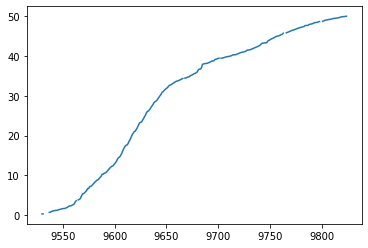

In [11]:
df_missouri['people_fully_vaccinated_per_hundred'].plot()

In [12]:
data = df_missouri['people_fully_vaccinated_per_hundred'].values.reshape(-1,1)
scaler = StandardScaler()
data = scaler.fit_transform(data)

Building the Model

In [13]:
model = ARIMA(data, order=(25,1,0))
model = model.fit()

Forecasting total vaccinations for next 90 days

In [14]:

num_days = 90
results = model.predict(start=data.size, end=data.size+num_days-1, dunamic=True)
results = scaler.inverse_transform(results.reshape(-1, 1))

Creating the Date frame for the next 90days

In [15]:
start_date = df_missouri['date'].values[-1]
start_date = np.datetime64(start_date) + np.timedelta64(1,'D')
start_date = pd.to_datetime(str(start_date))
start_date = start_date.strftime('%Y-%m-%d')
rng = pd.date_range(start_date, periods=90, freq='D')
date_frame = pd.DataFrame({ 'Date': rng}) 

Plotting the Forecast

Text(0.5, 1.0, 'Forecasting of people_fully_vaccinated_per_hundred for the next 90 days')

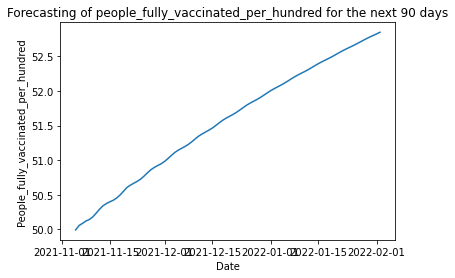

In [16]:
plt.plot(date_frame,results)
plt.xlabel('Date')
plt.ylabel('People_fully_vaccinated_per_hundred')
plt.title('Forecasting of people_fully_vaccinated_per_hundred for the next 90 days')

Exporting the forecasting data to the CSV file

In [17]:

results_frame = pd.DataFrame(results, columns= ['results'])
frame = [date_frame["Date"], results_frame["results"]]
headers = ["date_frame", "results_frame"]

final_df = pd.concat(frame, axis=1, keys=headers)
final_df.to_csv('Missouri.csv')

